<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Watchlist study**
In this study we explore the possibilities with my IMDb Watchlist. The dataset has attributes such as movie title, date added, year of release, genres, average rating, etc...

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file = os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [4]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
174,2025-12-14,Secondhand Lions,Movie,7.5,109,2003,"Comedy, Drama, Family",65745,2003-09-19,Tim McCanlies,To watch with mom
175,2025-12-14,"Mary, Queen of Scots",Movie,7.1,128,1971,"Biography, Drama, History",5194,1972-03-28,Charles Jarrott,To watch with mom
176,2025-12-20,Ladies in Lavender,Movie,7.0,104,2004,"Drama, Music, Romance",13530,2005-05-27,Charles Dance,To watch with mom
177,2025-12-20,Mrs. Soffel,Movie,6.1,110,1984,"Drama, Romance",3849,1985-02-08,Gillian Armstrong,To watch with mom
178,2025-12-21,The Lonely Passion of Judith Hearne,Movie,7.0,116,1987,"Drama, Romance",1422,1989-02-02,Jack Clayton,To watch with mom


In [5]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(179, 11)

In [6]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      179 non-null    datetime64[ns]
 1   Title           179 non-null    object        
 2   Title Type      179 non-null    object        
 3   IMDb Rating     179 non-null    float64       
 4   Runtime (mins)  179 non-null    int64         
 5   Year            179 non-null    int64         
 6   Genres          179 non-null    object        
 7   Num Votes       179 non-null    int64         
 8   Release Date    179 non-null    datetime64[ns]
 9   Directors       176 non-null    object        
 10  Status          178 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 15.5+ KB


In [7]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Date added,IMDb Rating,Runtime (mins),Year,Num Votes,Release Date
count,179,179.000000,179.000000,179.000000,179.000000,179
mean,2023-10-31 20:54:58.324022272,6.503352,111.620112,1990.664804,41732.949721,1991-04-14 04:09:23.128491648
min,2020-05-11 00:00:00,4.600000,74.000000,1939.000000,101.000000,1939-12-15 00:00:00
25%,2022-03-30 00:00:00,5.950000,96.000000,1981.500000,2166.000000,1982-02-22 12:00:00
50%,2023-09-11 00:00:00,6.500000,104.000000,1992.000000,7266.000000,1992-10-11 00:00:00
75%,2025-10-19 12:00:00,6.900000,115.000000,2000.500000,34479.000000,2001-04-21 12:00:00
max,2025-12-21 00:00:00,8.800000,317.000000,2025.000000,846657.000000,2025-10-10 00:00:00
std,NaN,0.778785,32.421224,16.408734,92169.165577,NaN


# **Basic column data plotting**

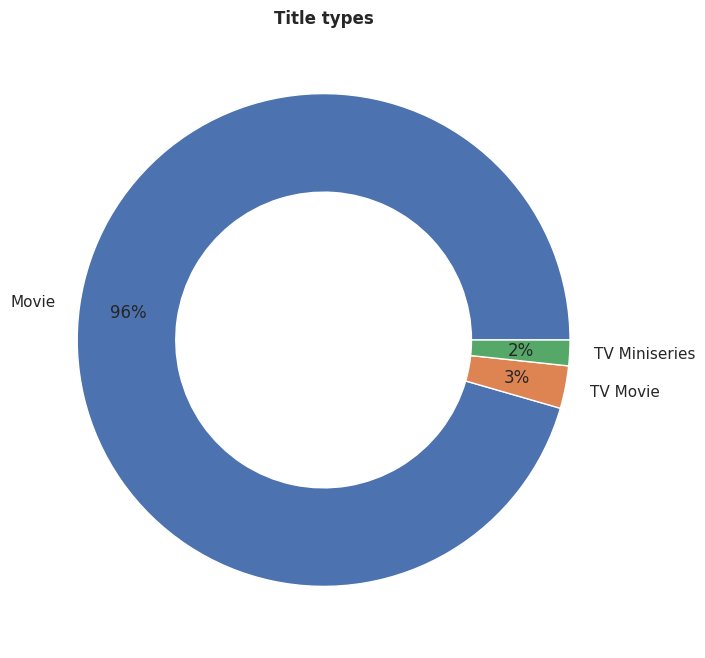

In [8]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

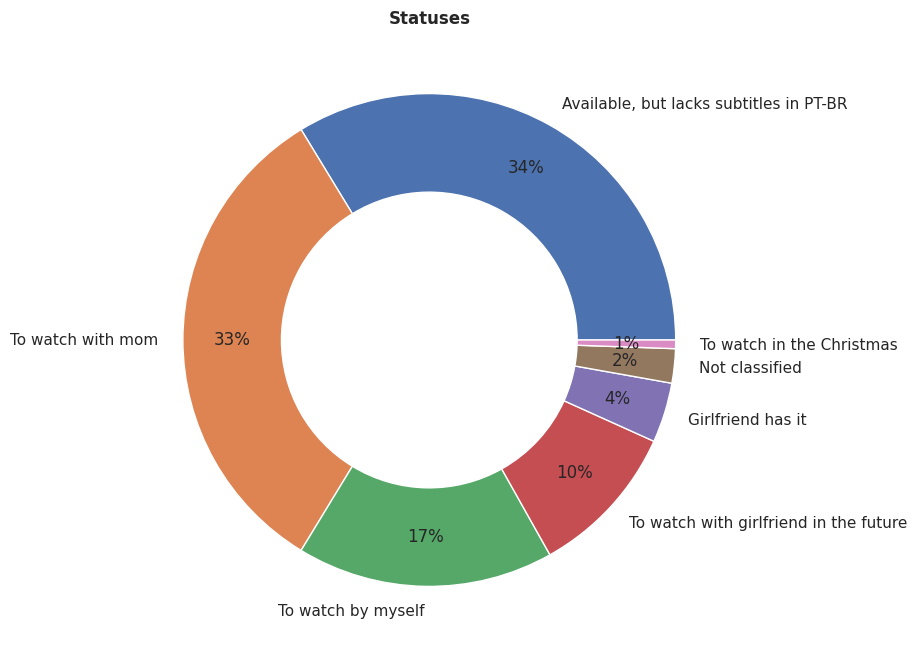

In [9]:
# Displaying the statuses present in the dataset:
wl['Status'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Statuses', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the dataset:
wl['Date added'] = wl['Date added'].map(pd.to_datetime)
wl['Day added'] = wl['Date added'].apply(lambda x : x.day)
wl['Month added'] = wl['Date added'].apply(lambda x : x.month)
wl['Year added'] = wl['Date added'].apply(lambda x : x.year)
wl['Weekday added'] = wl['Date added'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      179 non-null    datetime64[ns]
 1   Title           179 non-null    object        
 2   Title Type      179 non-null    object        
 3   IMDb Rating     179 non-null    float64       
 4   Runtime (mins)  179 non-null    int64         
 5   Year            179 non-null    int64         
 6   Genres          179 non-null    object        
 7   Num Votes       179 non-null    int64         
 8   Release Date    179 non-null    datetime64[ns]
 9   Directors       176 non-null    object        
 10  Status          178 non-null    object        
 11  Day added       179 non-null    int64         
 12  Month added     179 non-null    int64         
 13  Year added      179 non-null    int64         
 14  Weekday added   179 non-null    int64         
dtypes: dat

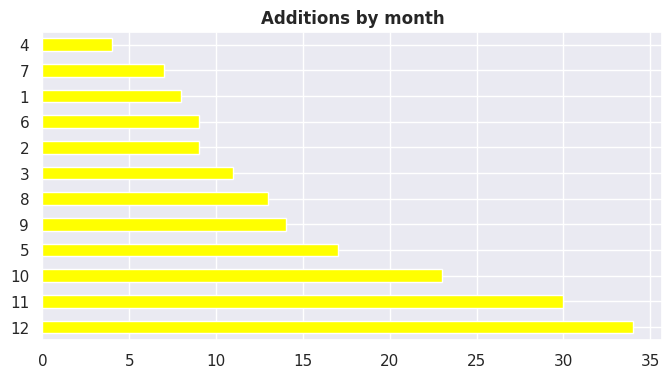

In [11]:
# Displaying the months with most and less additions:
wl['Month added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

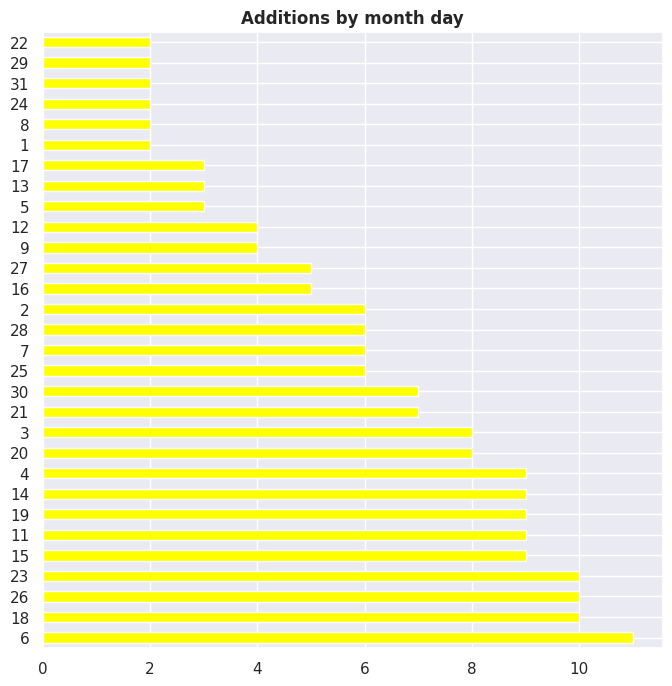

In [12]:
# Displaying the month days with most and less additions:
wl['Day added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

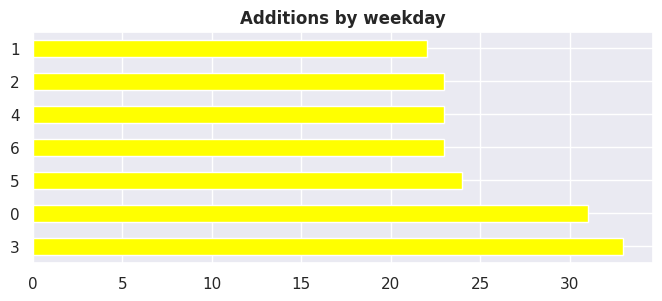

In [13]:
# Displaying the weekdays with most and less additions:
wl['Weekday added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

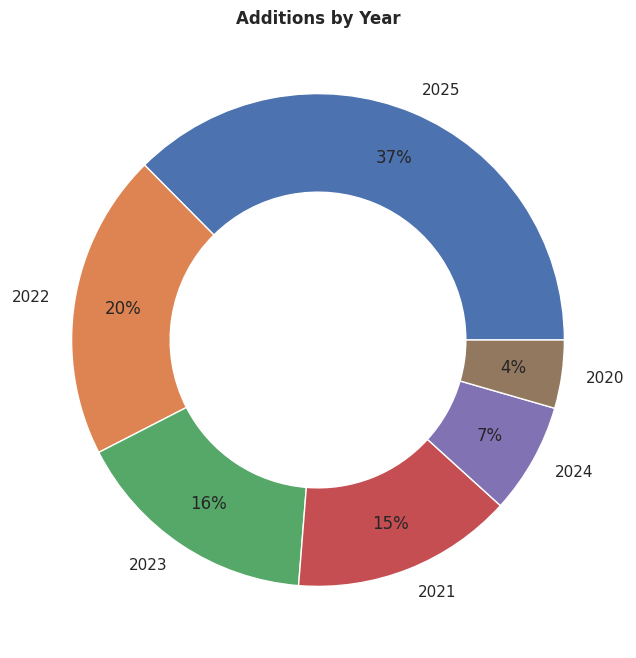

In [14]:
# Displaying the years with most and less additions:
wl['Year added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

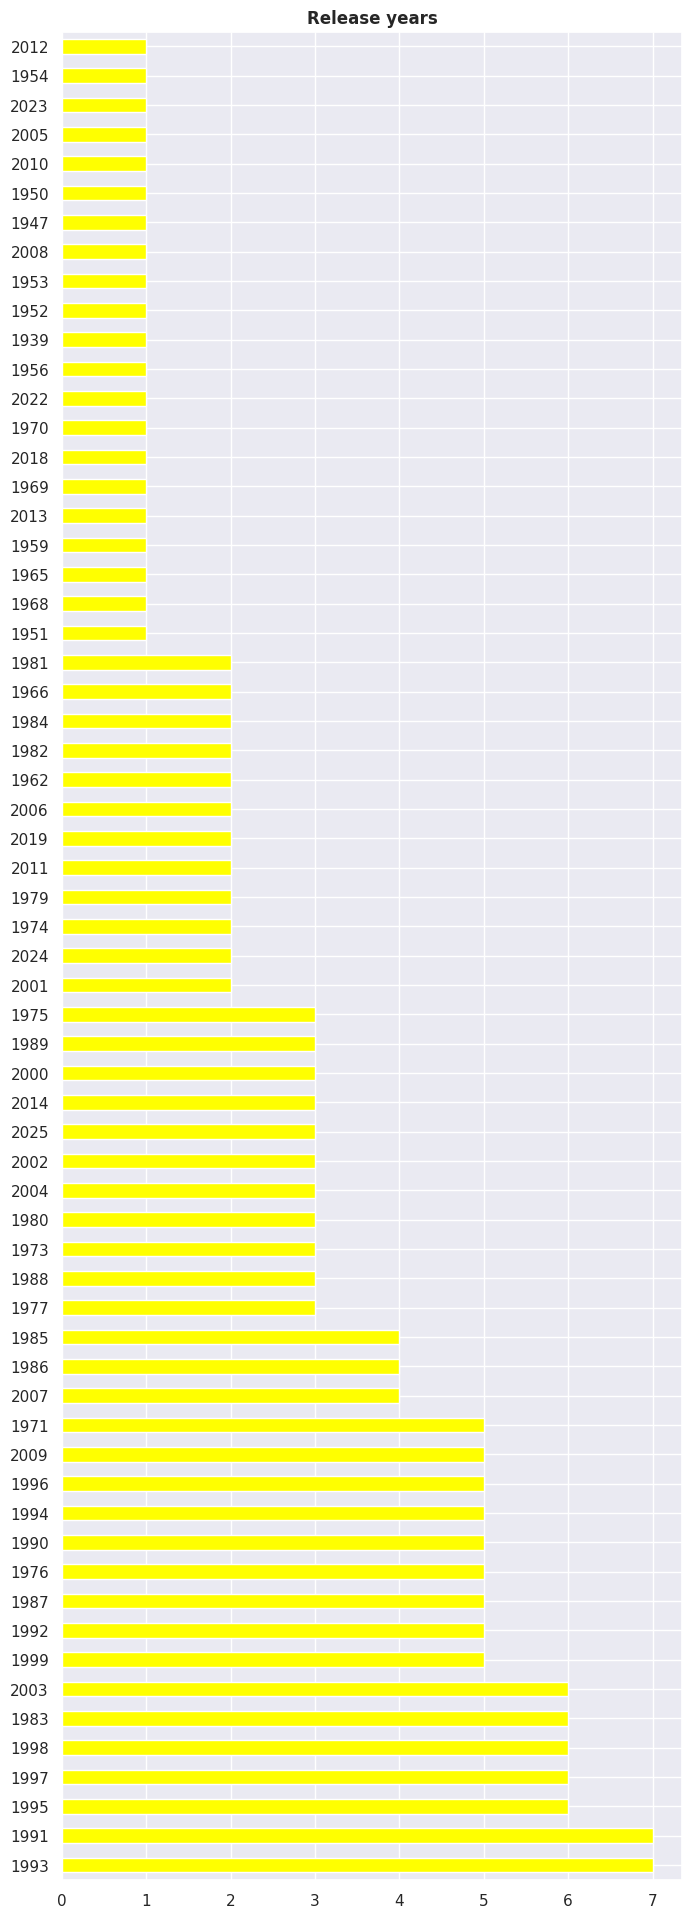

In [15]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

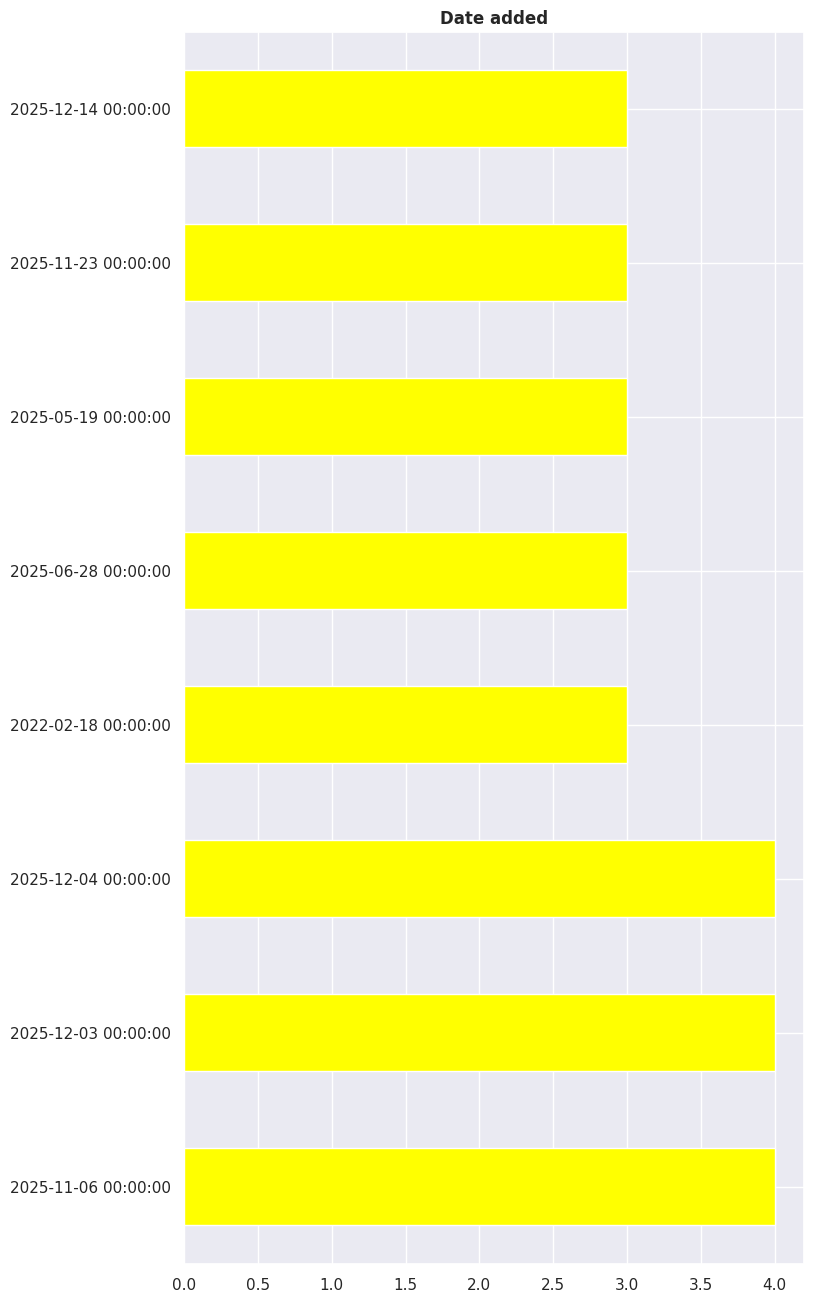

In [16]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = wl.groupby('Date added').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Date added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [17]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s


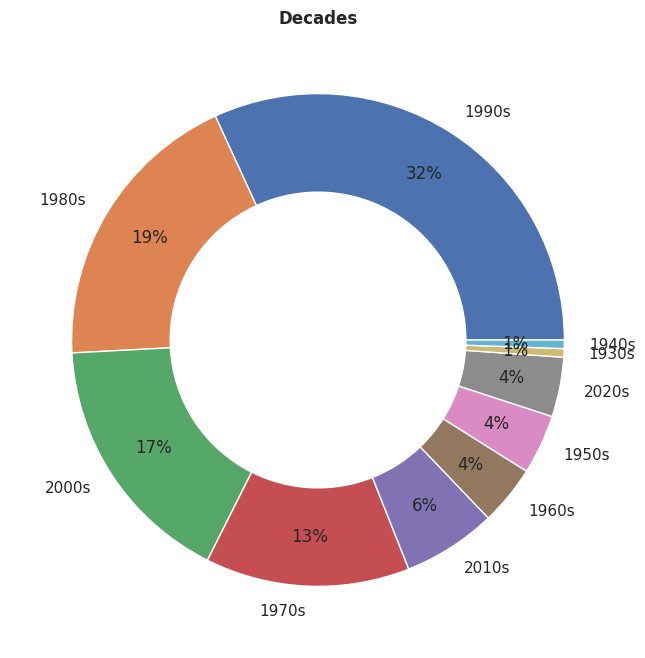

In [18]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay


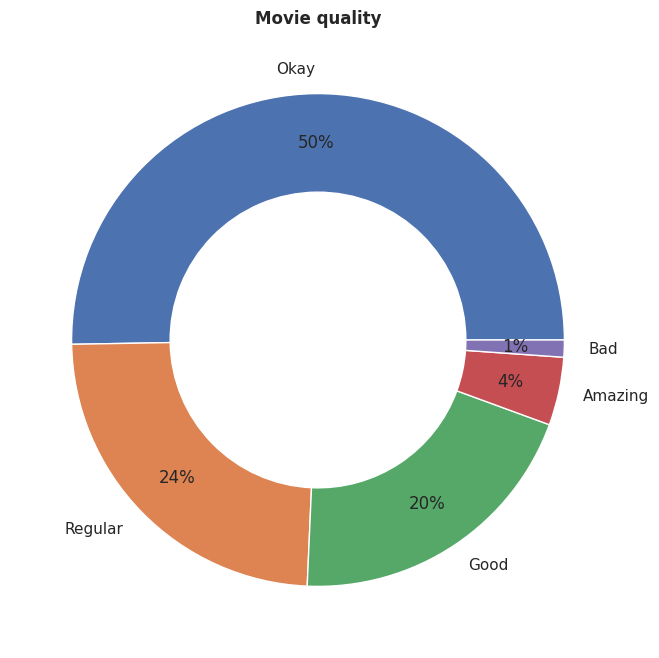

In [20]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes


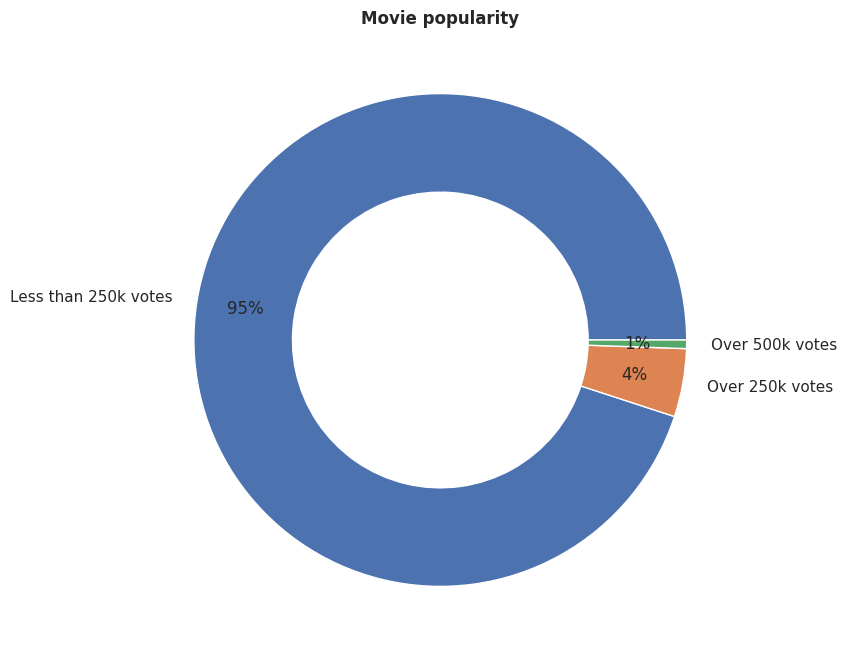

In [22]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59


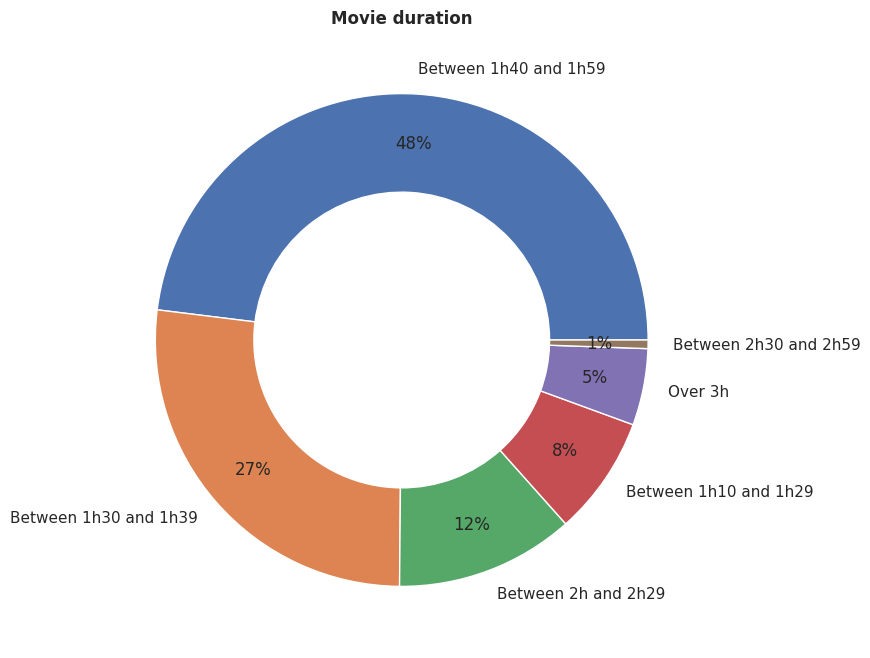

In [24]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month added'].apply(year_quartile)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39,Fourth
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59,Fourth


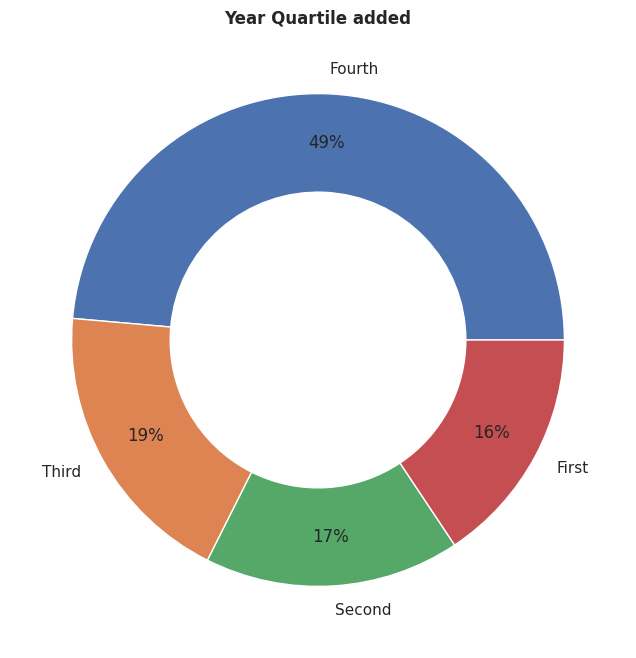

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day added'].apply(month_half)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17,Alan Shapiro,...,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second,First
1,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",...,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First
2,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",...,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First
3,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,...,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39,Fourth,Second
4,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",...,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59,Fourth,Second


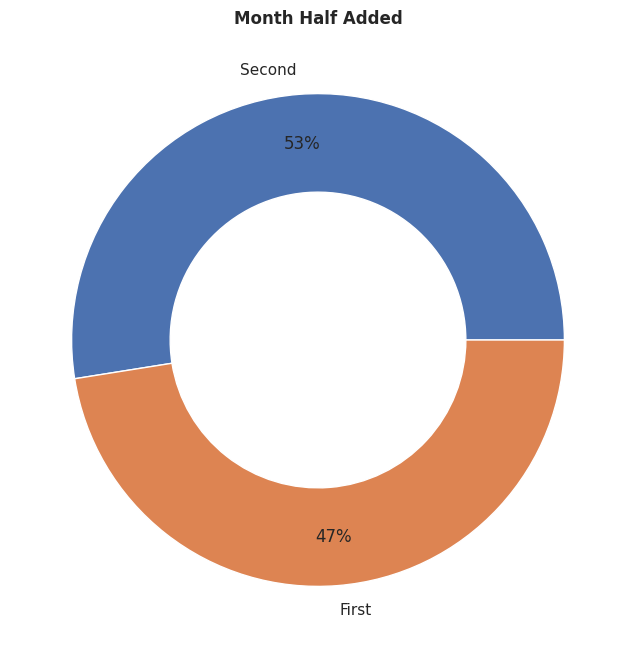

In [28]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [29]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         153    26
Adventure      155    24
Animation      177     2
Biography      166    13
Comedy         128    51
Crime          137    42
Documentary    175     4
Drama           53   126
Family         161    18
Fantasy        168    11
Film-Noir      176     3
History        167    12
Horror         169    10
Music          174     5
Mystery        161    18
Romance        143    36
Sci-Fi         171     8
Sport          172     7
Thriller       136    43
War            171     8
Western        177     2


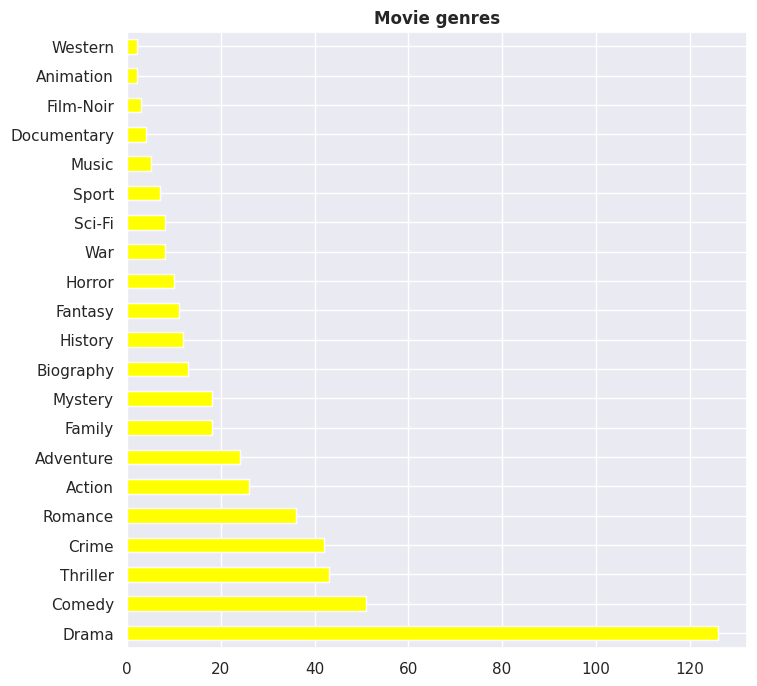

In [31]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [45]:
wl['Directors'].value_counts()

director_counts = (
    wl['Directors']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Director', 'Directors': 'Count'})
)

print(director_counts.head(10))

                 Count  count
0       Barry Levinson      8
1       Sidney Poitier      7
2        Daniel Petrie      7
3    Peter Bogdanovich      6
4         Oliver Stone      6
5          James Ivory      6
6         Hendel Butoy      5
7  Wolfgang Reitherman      5
8         Charles Band      5
9   John Frankenheimer      5


<Axes: title={'center': 'Directors with at Least 2 Appearances'}, xlabel='Director', ylabel='Number of Movies'>

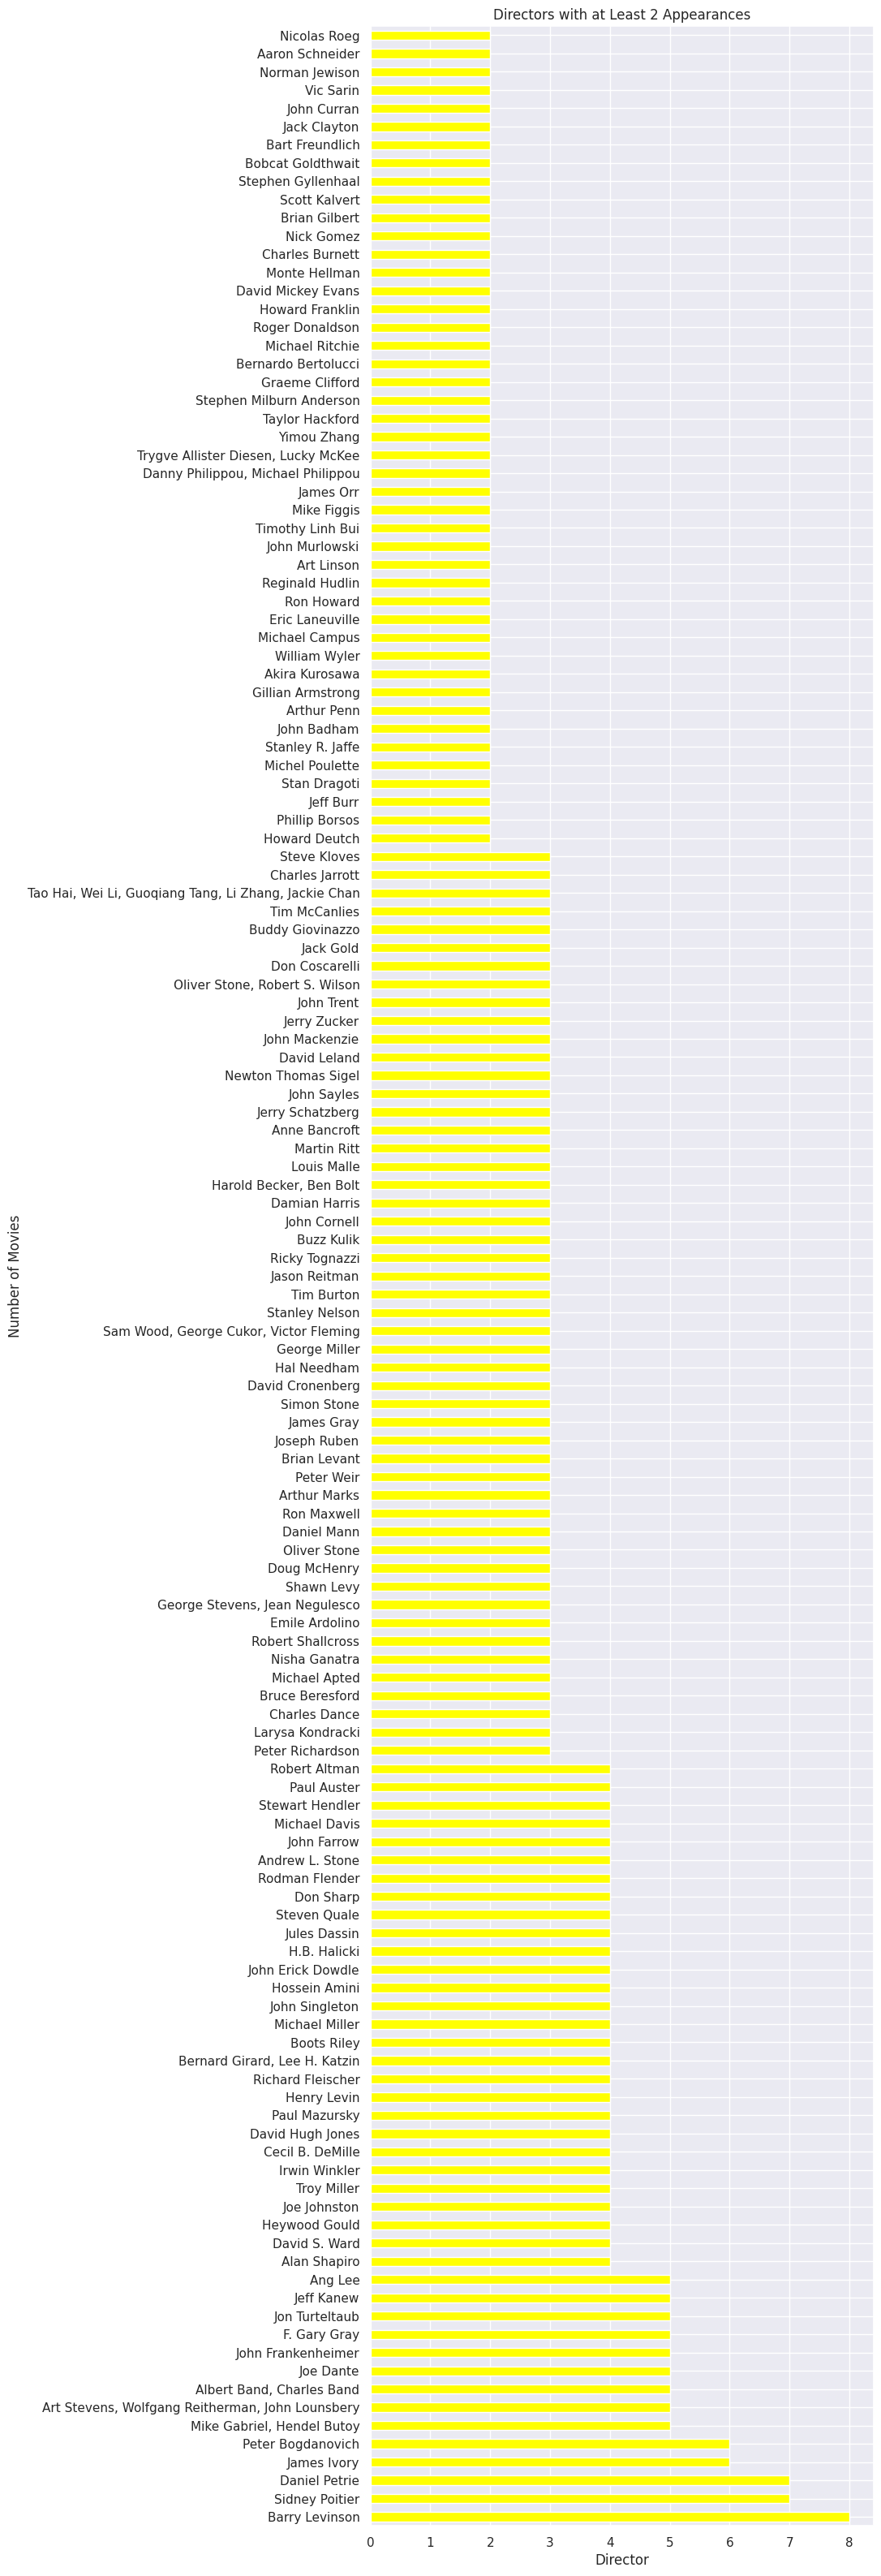

In [46]:
director_counts = wl['Directors'].value_counts()

directors_2plus = director_counts[director_counts >= 2]

directors_2plus.plot(kind = 'barh', color = 'yellow', figsize = (8, 40),
                     title='Directors with at Least 2 Appearances',
                     xlabel='Director',
                     ylabel='Number of Movies'
)